In [1]:
library(tidyverse) ## basic
library(readxl) ## read excel
library(ggpubr) ## combining multiple graphs

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# load summary data
data_feces <- read_excel("/Users/dagmarschierova/MEGA/IMG/GLM_edgeR_summary_for_fig.xlsx", sheet="mice stool", range="A3:E13")
data_ileum <- read_excel("/Users/dagmarschierova/MEGA/IMG/GLM_edgeR_summary_for_fig.xlsx", sheet="mice ileum", range="A3:E13")
data_stool <- read_excel("/Users/dagmarschierova/MEGA/IMG/GLM_edgeR_summary_for_fig.xlsx", sheet="patients CD", range="E3:I13")

# load metadata
meta_feces <- read_tsv("/Users/dagmarschierova/MEGA/IMG/study_2_mice_stool/statistics GLM in R/metadata.tsv")
meta_ileum <- read_tsv("/Users/dagmarschierova/MEGA/IMG/study_3/GML-cofounding_control/experiment_1/metadata_experiment_1.tsv")
meta_stool <- read_tsv("/Users/dagmarschierova/MEGA/IMG/study_4_patients_CD_n31/GLM-cofounding_control/metadata_all_patients.tsv")

# load tax data
tax_feces <- read_tsv("/Users/dagmarschierova/MEGA/IMG/study_2_mice_stool/statistics GLM in R/summarize_taxa_absolute/table-with-taxonomy_L6.tsv", skip = 1)
tax_id <- tax_feces$`#OTU ID`
tax_feces <- data.frame(tax_feces[, -1], check.names = FALSE)
rownames(tax_feces) = tax_id
tax_feces <- t(tax_feces)

tax_ileum <- read_tsv("/Users/dagmarschierova/MEGA/IMG/study_3/GML-cofounding_control/experiment_1/summarize_taxa_absolute-vsearch-gg-97/table-with-taxonomy-vsearch-gg-97_L6.tsv", skip = 1)
tax_id <- tax_ileum$`#OTU ID`
tax_ileum <- data.frame(tax_ileum[, -1], check.names = FALSE)
rownames(tax_ileum) = tax_id
tax_ileum <- t(tax_ileum)

tax_stool <- read_tsv("/Users/dagmarschierova/MEGA/IMG/study_4_patients_CD_n31/GLM-cofounding_control/summarize_taxa_absolute/table-with-taxonomy_L6.tsv", skip = 1)
tax_id <- tax_stool$`#OTU ID`
tax_stool <- data.frame(tax_stool[, -1], check.names = FALSE)
rownames(tax_stool) = tax_id
tax_stool <- t(tax_stool)

# merge taxonomy with metadata
tax_feces <- merge(tax_feces, meta_feces, by.x=0, by.y=c("#SampleID"))
tax_ileum <- merge(tax_ileum, meta_ileum, by.x=0, by.y=c("SampleID"))
tax_stool <- merge(tax_stool, meta_stool, by.x=0, by.y=c("SampleID"))


Rows: 21 Columns: 8

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): LinkerPrimerSequence, Label, Sex, Litter, Cre_genotype, Cage
dbl (1): #SampleID
lgl (1): BarcodeSequence


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 16 Columns: 8

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (7): SampleID, LinkerPrimerSequence, Label, Sex, Litter, Cre_genoty

In [3]:
data_feces$Pval <- round(x=data_feces$Pval, digits=3)
data_ileum$Pval <- round(x=data_ileum$Pval, digits=3)
data_stool$Pval <- round(x=data_stool$Pval, digits=3)
head(data_stool)

Genera,Paneth,logFC,Pval,FDR
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Staphylococcus,low,-18.258973,0.000,0.000197051
Proteus,norm,15.819766,0.007,0.603576439
Prevotella,norm,9.747470,0.012,0.653869234
Cloacibacillus,low,-8.457703,0.016,0.653869234
Megamonas,norm,12.008005,0.019,0.653869234
Desulfovibrio,low,-6.460944,0.026,0.664592527


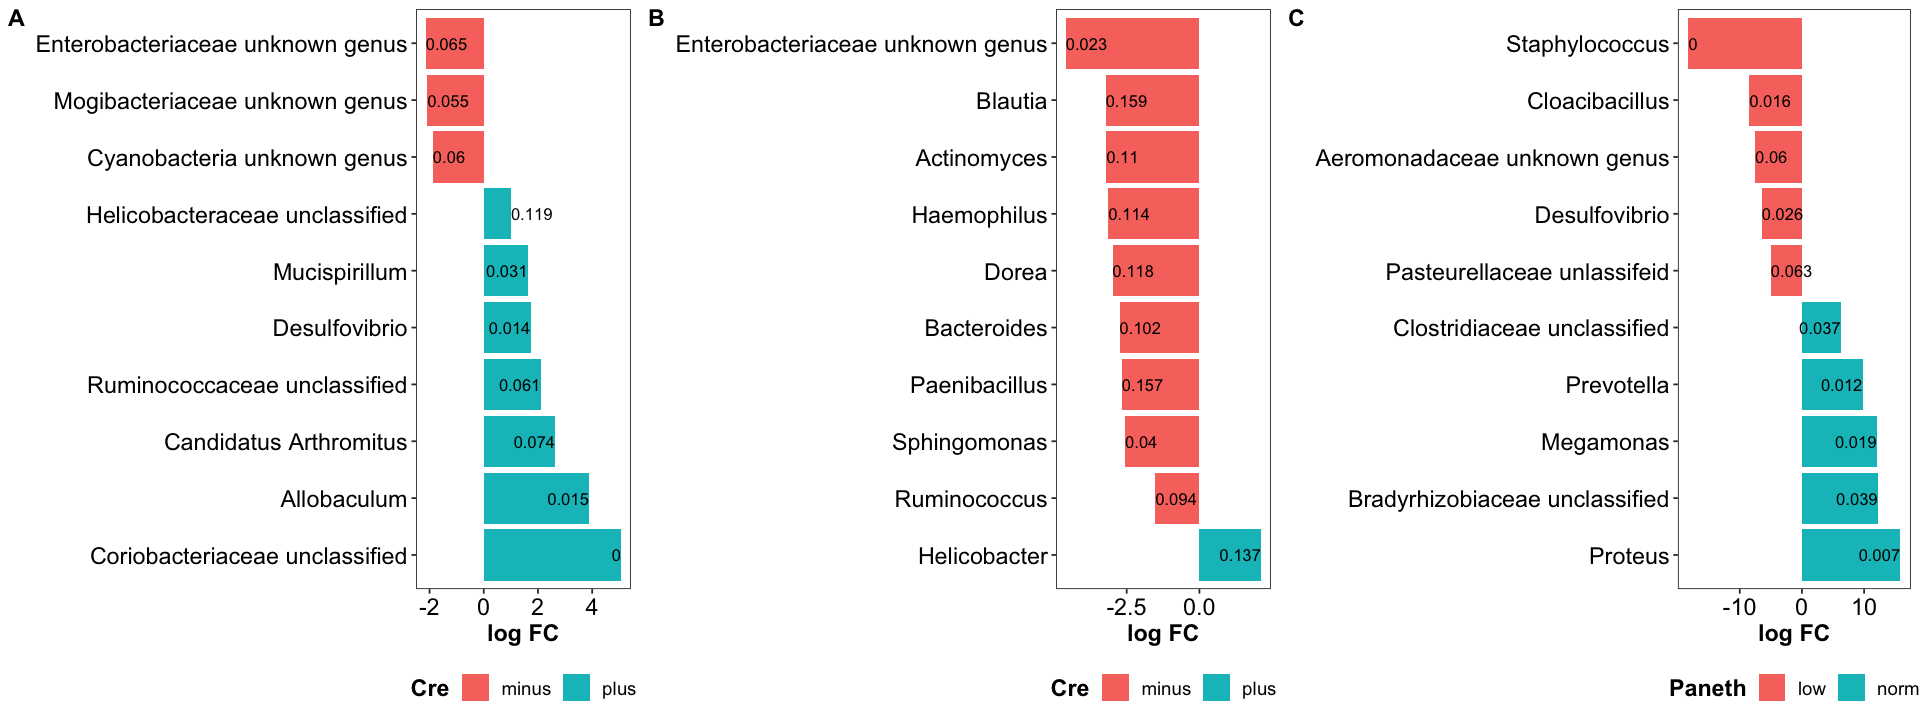

In [4]:
## Visualize differential abundance in mice feces, ileum and patient stool
options(repr.plot.width=16, repr.plot.height=6)

# mouse feces
plt_feces <- ggplot(data=data_feces, aes(y=reorder(Genera, -logFC), x=logFC)) +
  geom_bar(stat="identity", aes(fill=Cre)) +
  geom_text(aes(label=Pval), hjust='inward', color="black", size=3.5) +
  labs(x="log FC", y="") +
  theme_bw() +
  theme(panel.grid=element_blank(), legend.title=element_text(face="bold"),
        text=element_text(size=14, colour="black"),
        axis.text.x = element_text(size = 14, colour = "black"),
        axis.text.y = element_text(size = 14, colour = "black"),
        axis.title.x=element_text(face="bold"))

# mouse ileum
plt_ileum <- ggplot(data=data_ileum, aes(y=reorder(Genera, -logFC), x=logFC)) +
  geom_bar(stat="identity", aes(fill=Cre)) +
  geom_text(aes(label=Pval), hjust='inward', color="black", size=3.5) +
  labs(x="log FC", y="") +
  theme_bw() +
  theme(panel.grid=element_blank(), legend.title=element_text(face="bold"),
        text=element_text(size=14, colour="black"),
        axis.text.x = element_text(size = 14, colour = "black"),
        axis.text.y = element_text(size = 14, colour = "black"),
        axis.title.x=element_text(face="bold"))

# patient stool
plt_stool <- ggplot(data=data_stool, aes(y=reorder(Genera, -logFC), x=logFC)) +
  geom_bar(stat="identity", aes(fill=Paneth)) +
  geom_text(aes(label=Pval), hjust='inward', color="black", size=3.5) +
  labs(x="log FC", y="") +
  theme_bw() +
  theme(panel.grid=element_blank(), legend.title=element_text(face="bold"),
        text=element_text(size=14, colour="black"),
        axis.text.x = element_text(size = 14, colour = "black"),
        axis.text.y = element_text(size = 14, colour = "black"),
        axis.title.x=element_text(face="bold"))

# combine plots
diff_abund <- ggarrange(plt_feces, plt_ileum, plt_stool, ncol = 3, nrow = 1, 
                        labels = c('A', 'B', 'C'),
                        legend="bottom")
diff_abund

### Plot taxa mouse feces

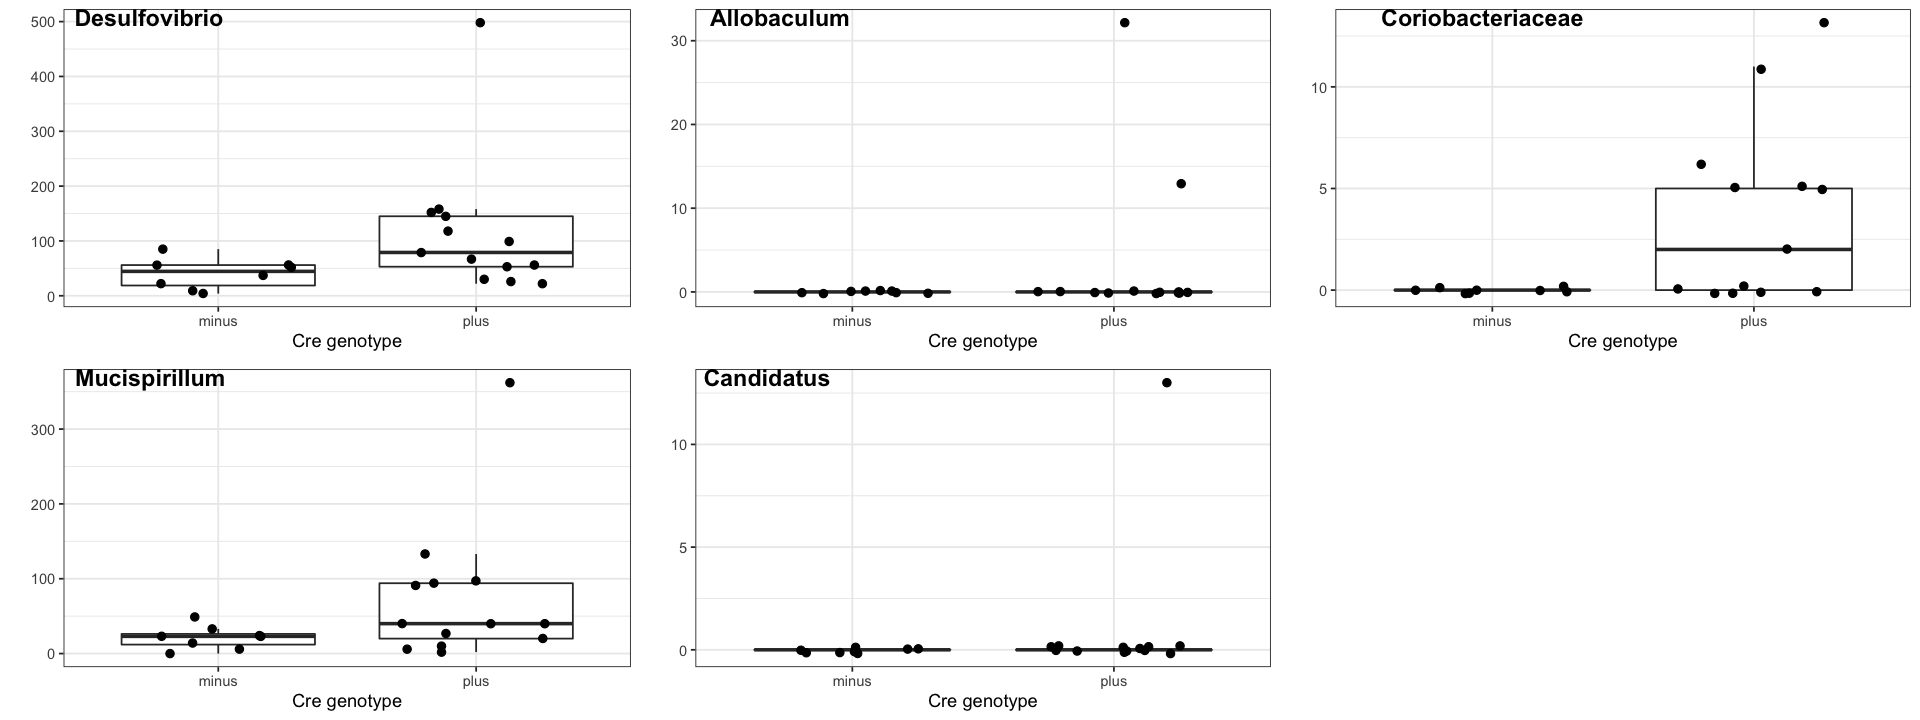

In [5]:
desulfovibrio <- ggplot(data=tax_feces, aes(x=Cre_genotype, y=`k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Desulfovibrio`)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=2) +
      labs(x="Cre genotype", y="") +
      theme_bw()

allobaculum <- ggplot(data=tax_feces, aes(x=Cre_genotype, y=`k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Allobaculum`)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=2) +
      labs(x="Cre genotype", y="") +
      theme_bw()

coriobacteriaceae <- ggplot(data=tax_feces, aes(x=Cre_genotype, y=`k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;Other`)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=2) +
      labs(x="Cre genotype", y="") +
      theme_bw()

mucispirillum <- ggplot(data=tax_feces, aes(x=Cre_genotype, y=`k__Bacteria;p__Deferribacteres;c__Deferribacteres;o__Deferribacterales;f__Deferribacteraceae;g__Mucispirillum`)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=2) +
      labs(x="Cre genotype", y="") +
      theme_bw()

candidatus <- ggplot(data=tax_feces, aes(x=Cre_genotype, y=`k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae;g__Candidatus Arthromitus`)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=2) +
      labs(x="Cre genotype", y="") +
      theme_bw()

# combine plots
plt_tax_feces <- ggarrange(desulfovibrio, allobaculum, coriobacteriaceae, mucispirillum, candidatus,
                        ncol = 3, nrow = 2,
                        labels=c('Desulfovibrio', 'Allobaculum', 'Coriobacteriaceae', 'Mucispirillum', 'Candidatus'))
plt_tax_feces

### Plot taxa mouse ileum

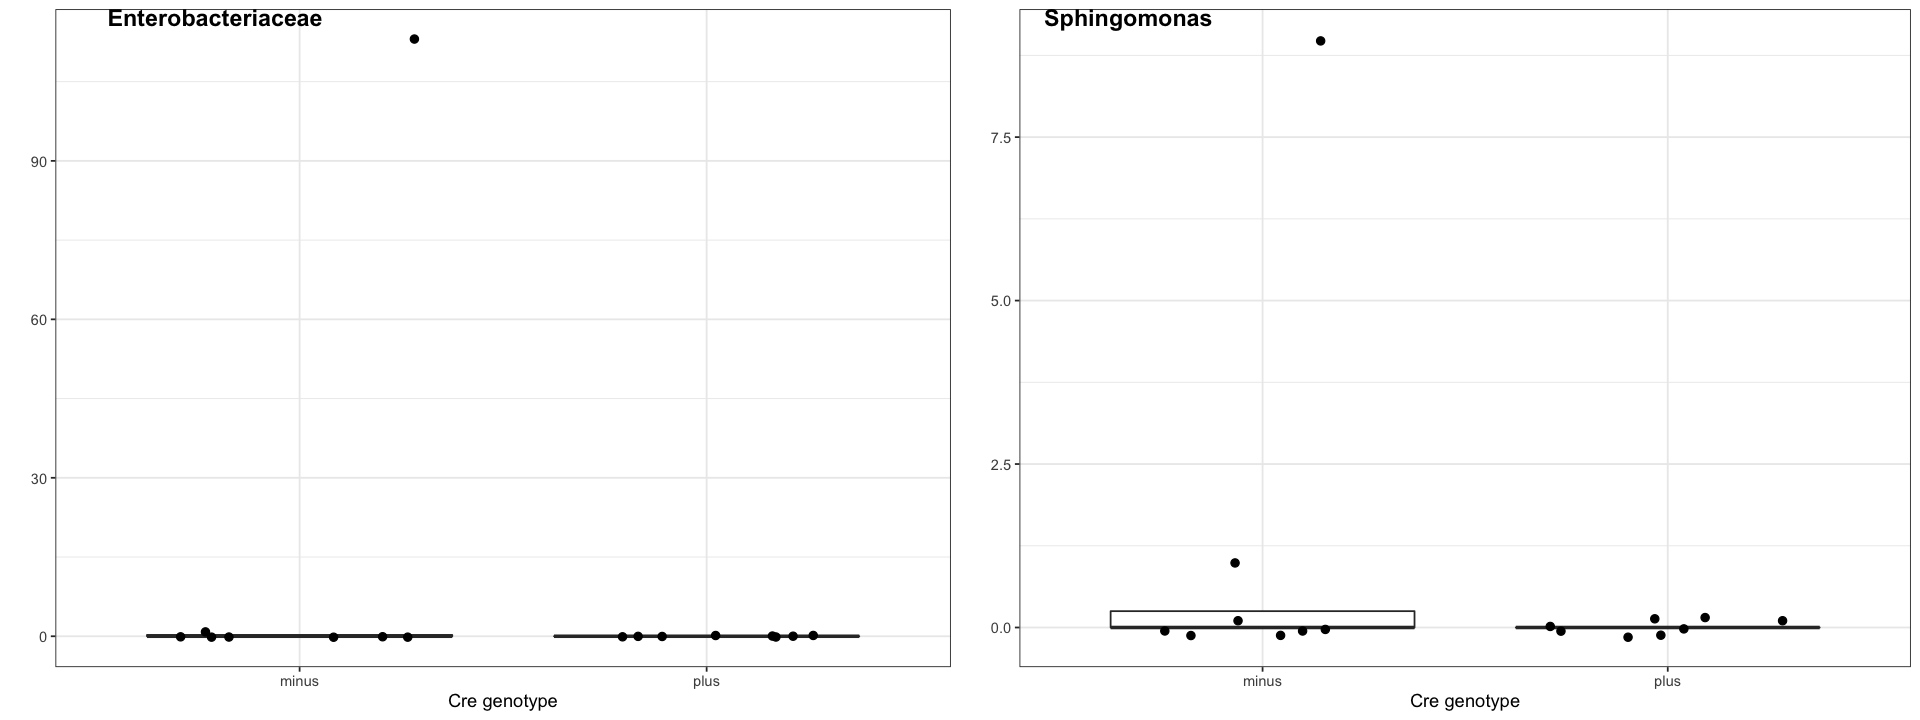

In [6]:
enterobacteriaceae <- ggplot(data=tax_ileum, aes(x=Cre_genotype, y=`k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__`)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=2) +
      labs(x="Cre genotype", y="") +
      theme_bw()

sphingomonas <- ggplot(data=tax_ileum, aes(x=Cre_genotype, y=`k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Sphingomonadales;f__Sphingomonadaceae;g__Sphingomonas`)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=2) +
      labs(x="Cre genotype", y="") +
      theme_bw()

 # combine plots
plt_tax_ileum <- ggarrange(enterobacteriaceae, sphingomonas,
                        ncol = 2, nrow = 1,
                        labels=c('Enterobacteriaceae', 'Sphingomonas'))
plt_tax_ileum

### Plot taxa patients stool

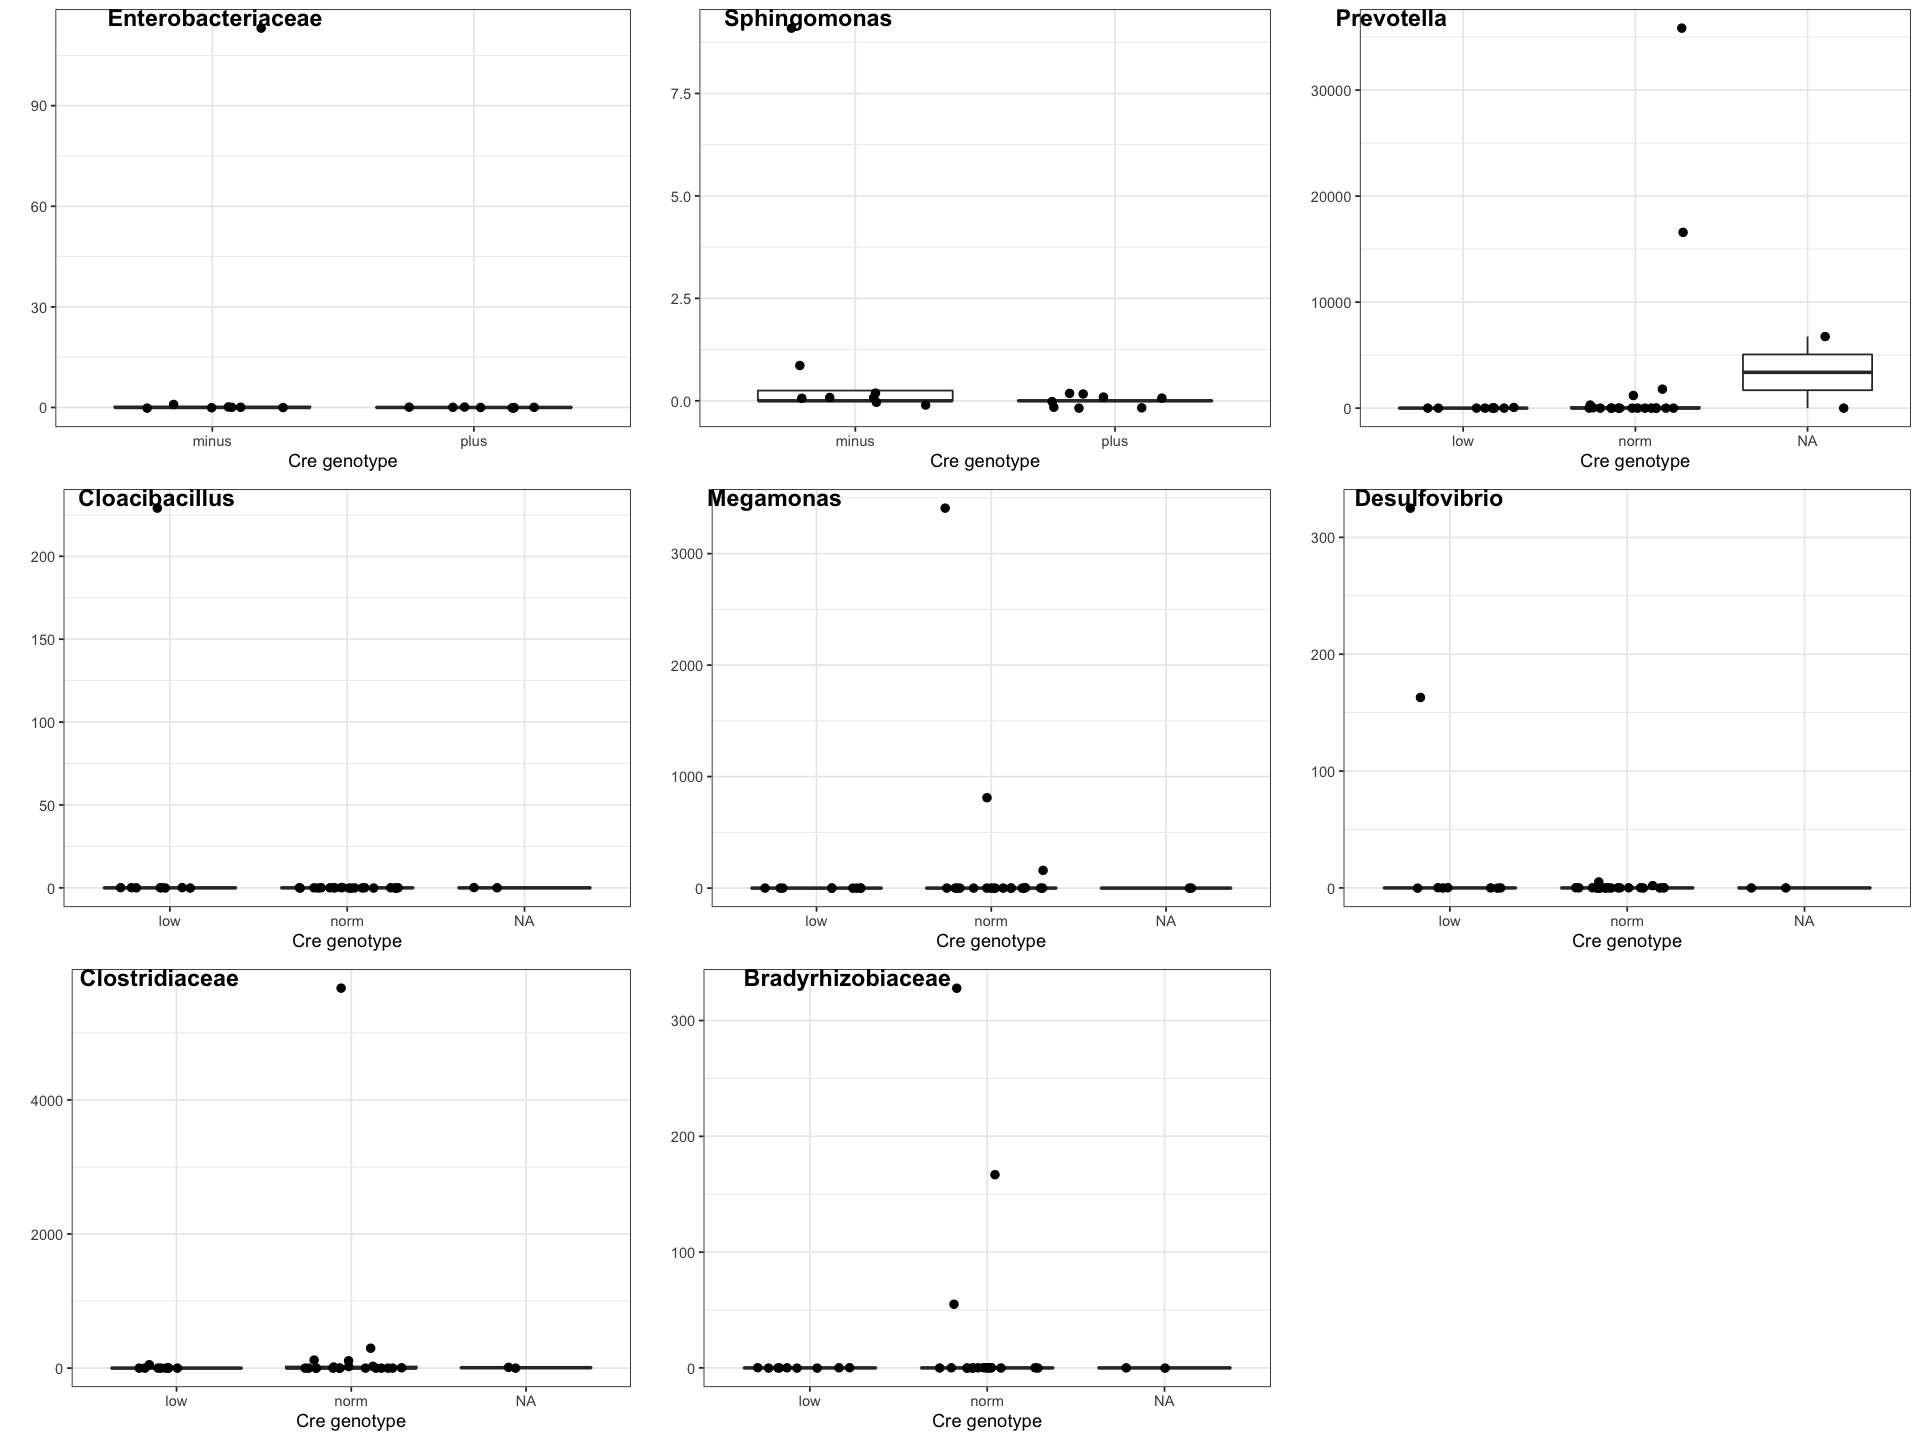

In [7]:
options(repr.plot.width=16, repr.plot.height=12)

staphylococcus <- ggplot(data=tax_stool, aes(x=Paneth_cell_phenotype, y=`k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus`)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=2) +
      labs(x="Cre genotype", y="") +
      theme_bw()

proteus <- ggplot(data=tax_stool, aes(x=Paneth_cell_phenotype, y=`k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__Proteus`)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=2) +
      labs(x="Cre genotype", y="") +
      theme_bw()

prevotella <- ggplot(data=tax_stool, aes(x=Paneth_cell_phenotype, y=`k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella`)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=2) +
      labs(x="Cre genotype", y="") +
      theme_bw()

cloacibacillus <- ggplot(data=tax_stool, aes(x=Paneth_cell_phenotype, y=`k__Bacteria;p__Synergistetes;c__Synergistia;o__Synergistales;f__Synergistaceae;g__Cloacibacillus`)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=2) +
      labs(x="Cre genotype", y="") +
      theme_bw()

megamonas <- ggplot(data=tax_stool, aes(x=Paneth_cell_phenotype, y=`k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Megamonas`)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=2) +
      labs(x="Cre genotype", y="") +
      theme_bw()

desulfovibrio <- ggplot(data=tax_stool, aes(x=Paneth_cell_phenotype, y=`k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Desulfovibrio`)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=2) +
      labs(x="Cre genotype", y="") +
      theme_bw()

clostridiaceae <- ggplot(data=tax_stool, aes(x=Paneth_cell_phenotype, y=`k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae;Other`)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=2) +
      labs(x="Cre genotype", y="") +
      theme_bw()

bradyrhizobiaceae <- ggplot(data=tax_stool, aes(x=Paneth_cell_phenotype, y=`k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Bradyrhizobiaceae;Other`)) +
      geom_boxplot(outlier.shape=NA) +
      geom_jitter(width=0.3, height=0.2, size=2) +
      labs(x="Cre genotype", y="") +
      theme_bw()


# combine plots
plt_tax_stool <- ggarrange(enterobacteriaceae, sphingomonas, prevotella, cloacibacillus, megamonas, desulfovibrio, clostridiaceae, bradyrhizobiaceae,
                ncol = 3, nrow = 3,
                labels=c('Enterobacteriaceae', 'Sphingomonas', 'Prevotella', 'Cloacibacillus', 'Megamonas', 'Desulfovibrio', 'Clostridiaceae', 'Bradyrhizobiaceae'))
plt_tax_stool